In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
train= pd.read_csv('/Users/anjugeorge/Desktop/Train_Dataset_NCACell6_allTemp_PH30_TH20_3inputs_T_Q_AmbT.csv',
                    names=['Temp','current','Ambient Temp','Final Temp'], header=None)

In [3]:
#train['time'] = range(1, len(train)+1)

In [4]:
train

,Temp,current,Ambient Temp,Final Temp
0,-7.21,0.002462,-10,-7.25
1,-7.21,0.002462,-10,-7.25
2,-7.22,0.002462,-10,-7.26
3,-7.21,0.002708,-10,-7.25
4,-7.24,0.002955,-10,-7.24
...,...,...,...,...
133981,41.41,0.003078,40,41.41
133982,41.41,0.003078,40,41.41
133983,41.41,0.003078,40,41.42
133984,41.41,0.003078,40,41.42


In [5]:
train.shape


(133986, 4)

In [6]:
train.isna().sum()

Temp            0
current         0
Ambient Temp    0
Final Temp      0
dtype: int64

In [7]:
train.isnull().sum()

Temp            0
current         0
Ambient Temp    0
Final Temp      0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133986 entries, 0 to 133985
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Temp          133986 non-null  float64
 1   current       133986 non-null  float64
 2   Ambient Temp  133986 non-null  int64  
 3   Final Temp    133986 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 4.1 MB


In [9]:
#EDA


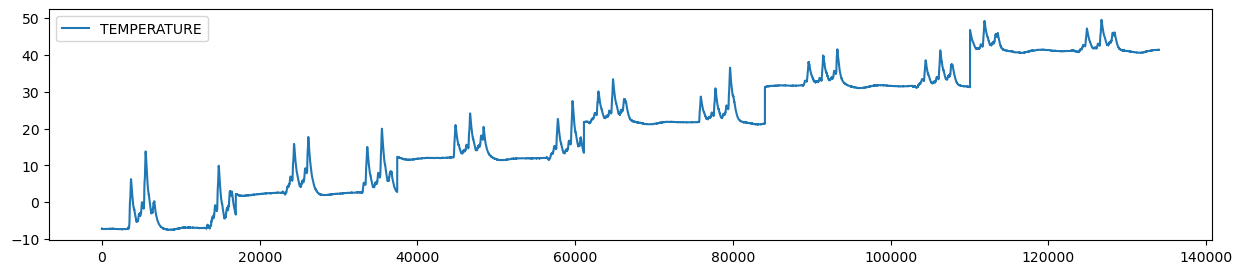

In [10]:
plt.figure(figsize=(15,3))
#plt.grid()
plt.plot(train['Temp'],  label='TEMPERATURE')

plt.legend()
plt.show()

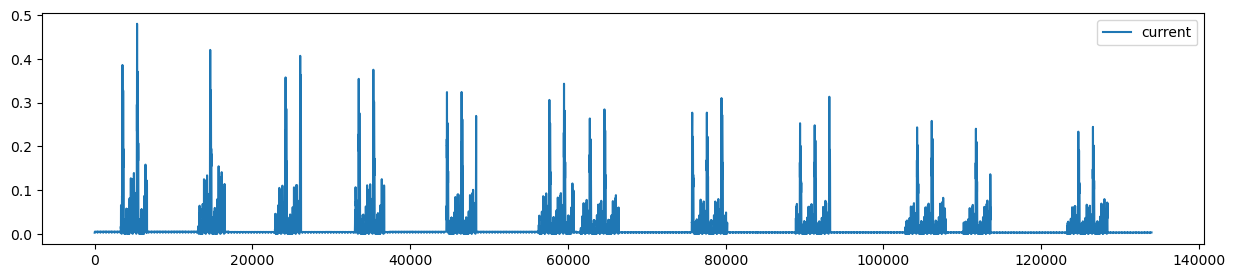

In [11]:
plt.figure(figsize=(15,3))
#plt.grid()
plt.plot(train['current'], label='current')
plt.legend()
plt.show()

In [12]:
test= pd.read_csv('/Users/anjugeorge/Desktop/test_data.csv',
                    names=['Temp','current','Ambient Temp','Final Temp'], header=None)
#test['time'] = range(1, len(test)+1)

In [13]:
test.shape

(30586, 4)

In [14]:
test


,Temp,current,Ambient Temp,Final Temp
0,22.87,0.022950,20,22.98
1,22.88,0.023064,20,22.99
2,22.89,0.023627,20,22.99
3,22.90,0.024191,20,22.99
4,22.91,0.024742,20,23.01
...,...,...,...,...
30581,21.12,0.000006,20,21.07
30582,21.11,0.000006,20,21.06
30583,21.11,0.000006,20,21.07
30584,21.11,0.000006,20,21.06


In [15]:

test.head()

,Temp,current,Ambient Temp,Final Temp
0,22.87,0.022950,20,22.98
1,22.88,0.023064,20,22.99
2,22.89,0.023627,20,22.99
3,22.90,0.024191,20,22.99
4,22.91,0.024742,20,23.01


In [16]:
test.tail()

,Temp,current,Ambient Temp,Final Temp
30581,21.12,0.000006,20,21.07
30582,21.11,0.000006,20,21.06
30583,21.11,0.000006,20,21.07
30584,21.11,0.000006,20,21.06
30585,21.11,0.000006,20,21.06


In [17]:
#preprocessing



In [18]:
X_train= train.drop(['Final Temp'], axis=1)

y_train = train['Final Temp']



In [19]:
X_test= test.drop(['Final Temp'], axis=1)

y_test = test['Final Temp']


In [20]:
#ALGORITHMS

In [21]:
#SUPPORT VECTOR REGRESSION
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train,y_train)

y_pred = regr.predict(X_test)
y_pred
print(np.shape(y_pred))

(30586,)


In [22]:
a=pd.DataFrame(y_test)
a=a.reset_index()
a=a.drop(columns='index')
a


prediction=pd.DataFrame(y_pred)
prediction=prediction.reset_index()
prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['current_temperature']=a
output['final_temp 30s_Prediction']=prediction[0]
output['Difference']=output['current_temperature']-output['final_temp 30s_Prediction']
output['% Change']=abs(output['Difference']/output['current_temperature'])*100
output

,current_temperature,final_temp 30s_Prediction,Difference,% Change
0,22.98,22.963825,0.016175,0.070385
1,22.99,22.973629,0.016371,0.071209
2,22.99,22.984521,0.005479,0.023830
3,22.99,22.995496,-0.005496,0.023904
4,23.01,23.006521,0.003479,0.015120
...,...,...,...,...
30581,21.07,21.232691,-0.162691,0.772147
30582,21.06,21.223499,-0.163499,0.776348
30583,21.07,21.223499,-0.153499,0.728518
30584,21.06,21.223499,-0.163499,0.776348


In [23]:

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("max_error for support vector regression;  ", max_error(y_test, y_pred))
print( "mean_absolute_error for  support vector regression; ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error for support vector regression: ", mse)
print("Root Mean Squared Error of support vector regression: ", rmse)
print("R2_score of support vector regression ",r2_score(y_test, y_pred))
avg_err = output['Difference'].mean()
print ('The average error is:   ',avg_err)

max_error for support vector regression;   2.2710747695190108
mean_absolute_error for  support vector regression;  0.14393411679716997
Mean Squared Error for support vector regression:  0.044508322686751874
Root Mean Squared Error of support vector regression:  0.21096995683450256
R2_score of support vector regression  0.9937819107749866
The average error is:    -0.06796471198402425


In [24]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train,y_train)
y_predict = lin_reg.predict(X_test)
y_predict

array([22.98182381, 22.99238707, 23.00719867, ..., 21.09543781,
       21.09543781, 21.09543781])

In [25]:
a=pd.DataFrame(y_test)
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(y_predict)
prediction=prediction.reset_index()
#prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['current_temperature']=a
output['final_temp 30s_Prediction']=prediction[0]
output['Difference']=output['current_temperature']-output['final_temp 30s_Prediction']
output['% Change']=abs(output['Difference']/output['current_temperature'])*100
output

,current_temperature,final_temp 30s_Prediction,Difference,% Change
0,22.98,22.981824,-0.001824,0.007937
1,22.99,22.992387,-0.002387,0.010383
2,22.99,23.007199,-0.017199,0.074809
3,22.99,23.022020,-0.032020,0.139277
4,23.01,23.036718,-0.026718,0.116114
...,...,...,...,...
30581,21.07,21.104922,-0.034922,0.165745
30582,21.06,21.095438,-0.035438,0.168271
30583,21.07,21.095438,-0.025438,0.120730
30584,21.06,21.095438,-0.035438,0.168271


In [26]:
mse = mean_squared_error(y_test, y_predict)
rmse = mse ** 0.5
print("MSE: ", mse)
print("RMSE: ", rmse)
from sklearn.metrics import max_error
print("max_error;  ", max_error(y_test, y_predict))
from sklearn.metrics import mean_absolute_error
print( "mean_absolute_error; ", mean_absolute_error(y_test, y_predict))
print("R2_score. ",r2_score(y_test, y_predict))
avg_err_lr = output['Difference'].mean()
print ('The average error is:    ',avg_err_lr)

MSE:  0.039852023040413305
RMSE:  0.19962971482325298
max_error;   2.2418343172621036
mean_absolute_error;  0.09052882578128292
R2_score.  0.9944324247667877
The average error is:     0.00047016150535508577


In [27]:
#DECISION TREE REGRESSOR

dtr = DecisionTreeRegressor().fit(X_train,y_train)
#DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      #max_features=None, max_leaf_nodes=None,
                      #min_impurity_decrease=0.0, min_impurity_split=None,
                      #min_samples_leaf=1, min_samples_split=2,
                      #min_weight_fraction_leaf=0.0, presort='deprecated',
                      #random_state=None, splitter='best') 
 
y_p = dtr.predict(X_test)
y_p

array([23.02, 23.02, 23.02, ..., 20.55, 20.55, 20.55])

In [28]:
a=pd.DataFrame(y_test)
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(y_p)
prediction=prediction.reset_index()
#prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['current_temperature']=a
output['final_temp 30s_Prediction']=prediction[0]
output['Difference']=output['current_temperature']-output['final_temp 30s_Prediction']
output['% Change']=abs(output['Difference']/output['current_temperature'])*100
output

,current_temperature,final_temp 30s_Prediction,Difference,% Change
0,22.98,23.02,-0.04,0.174064
1,22.99,23.02,-0.03,0.130492
2,22.99,23.02,-0.03,0.130492
3,22.99,23.02,-0.03,0.130492
4,23.01,23.03,-0.02,0.086919
...,...,...,...,...
30581,21.07,20.55,0.52,2.467964
30582,21.06,20.55,0.51,2.421652
30583,21.07,20.55,0.52,2.467964
30584,21.06,20.55,0.51,2.421652


In [29]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_p)
rmse = mse ** 0.5
print("MSE: ", mse)
print("RMSE: ", rmse)
print("max_error;  ", max_error(y_test, y_p))
print( "mean_absolute_error; ", mean_absolute_error(y_test, y_p))
print("R2_score. ",r2_score(y_test, y_p))
avg_err_dt = output['Difference'].mean()
print ('The average error is:    ',avg_err_dt)

MSE:  0.044630773752456956
RMSE:  0.21125996722629906
max_error;   2.809999999999995
mean_absolute_error;  0.09199723582422022
R2_score.  0.9937648036002765
The average error is:     0.004173621181656526


In [30]:
#RIDGE REGRESSION

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_test_rr= rr.predict(X_test)
pred_test_rr

array([22.98181427, 22.99237746, 23.00718863, ..., 21.09544058,
       21.09544058, 21.09544058])

In [31]:
X_test

,Temp,current,Ambient Temp
0,22.87,0.022950,20
1,22.88,0.023064,20
2,22.89,0.023627,20
3,22.90,0.024191,20
4,22.91,0.024742,20
...,...,...,...
30581,21.12,0.000006,20
30582,21.11,0.000006,20
30583,21.11,0.000006,20
30584,21.11,0.000006,20


In [32]:
a=pd.DataFrame(y_test)
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(pred_test_rr)
prediction=prediction.reset_index()
#prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['current_temperature']=a
output['final_temp 30s_Prediction']=prediction[0]
output['Difference']=output['current_temperature']-output['final_temp 30s_Prediction']
output['% Change']=abs(output['Difference']/output['current_temperature'])*100
output

,current_temperature,final_temp 30s_Prediction,Difference,% Change
0,22.98,22.981814,-0.001814,0.007895
1,22.99,22.992377,-0.002377,0.010341
2,22.99,23.007189,-0.017189,0.074766
3,22.99,23.022009,-0.032009,0.139231
4,23.01,23.036707,-0.026707,0.116067
...,...,...,...,...
30581,21.07,21.104925,-0.034925,0.165758
30582,21.06,21.095441,-0.035441,0.168284
30583,21.07,21.095441,-0.025441,0.120743
30584,21.06,21.095441,-0.035441,0.168284


In [33]:
mse = mean_squared_error(y_test,pred_test_rr)
rmse = mse ** 0.5 
rmse = mse ** 0.5
print("MSE: ", mse)
print("RMSE: ", rmse)
print("max_error;  ", max_error(y_test, pred_test_rr))
print( "mean_absolute_error; ", mean_absolute_error(y_test, pred_test_rr))
print("R2_score. ",r2_score(y_test, pred_test_rr))
avg_err_rr = output['Difference'].mean()
print ('The average error is:    ',avg_err_rr)

MSE:  0.039852711011584926
RMSE:  0.19963143793397103
max_error;   2.241824926606011
mean_absolute_error;  0.090531268972611
R2_score.  0.9944323286529404
The average error is:     0.0004700512117163259


In [34]:
#ELASTICNET REGRESSION

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)
pred_test_enet

array([22.87864608, 22.88859831, 22.89878677, ..., 21.12553901,
       21.12553901, 21.12553901])

In [35]:
a=pd.DataFrame(y_test)
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(pred_test_enet)
prediction=prediction.reset_index()
#prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['current_temperature']=a
output['final_temp 30s_Prediction']=prediction[0]
output['Difference']=output['current_temperature']-output['final_temp 30s_Prediction']
output['% Change']=abs(output['Difference']/output['current_temperature'])*100
output

,current_temperature,final_temp 30s_Prediction,Difference,% Change
0,22.98,22.878646,0.101354,0.441053
1,22.99,22.888598,0.101402,0.441069
2,22.99,22.898787,0.091213,0.396752
3,22.99,22.908976,0.081024,0.352433
4,23.01,22.919158,0.090842,0.394794
...,...,...,...,...
30581,21.07,21.135431,-0.065431,0.310542
30582,21.06,21.125539,-0.065539,0.311201
30583,21.07,21.125539,-0.055539,0.263593
30584,21.06,21.125539,-0.065539,0.311201


In [36]:
mse = mean_squared_error(y_test,pred_test_enet)
rmse = mse ** 0.5 
rmse = mse ** 0.5
print("MSE: ", mse)
print("RMSE: ", rmse)
print("max_error;  ", max_error(y_test, pred_test_enet))
print( "mean_absolute_error; ", mean_absolute_error(y_test, pred_test_enet))
print("R2_score. ",r2_score(y_test, pred_test_enet))
avg_err_rr = output['Difference'].mean()
print ('The average error is:    ',avg_err_rr)

MSE:  0.11536258083655317
RMSE:  0.3396506747182363
max_error;   2.734410290945654
mean_absolute_error;  0.15565664325255232
R2_score.  0.9838831306693336
The average error is:     -0.0006606969816331744


In [37]:
#PLOTTING THE GRAPHS

In [38]:
X_test['time'] = range(1, len(X_test)+1)


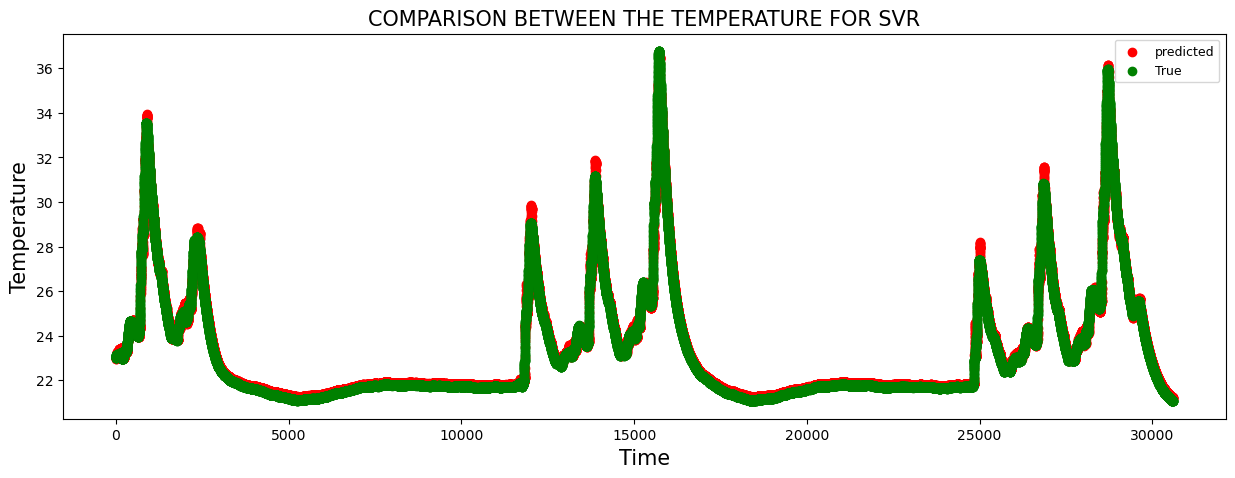

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.scatter(X_test['time'],y_pred , c='red', label ='predicted')
plt.scatter(X_test['time'],y_test , c='green',label ='True')
plt.legend(loc="upper right", fontsize = 9)
plt.title("COMPARISON BETWEEN THE TEMPERATURE FOR SVR",fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Temperature', fontsize=15)


plt.show()

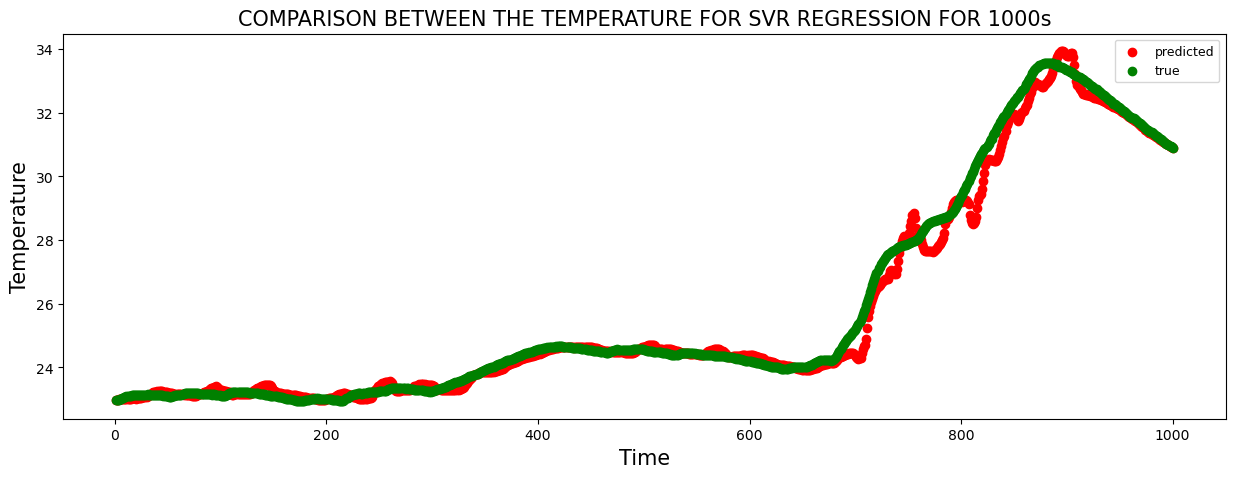

In [40]:
plt.figure(figsize=(15, 5))
plt.scatter(X_test['time'][:1000], y_pred[:1000], c='red', label='predicted')
plt.scatter(X_test['time'][:1000], y_test[:1000], c='green', label='true')
plt.title("COMPARISON BETWEEN THE TEMPERATURE FOR SVR REGRESSION FOR 1000s", fontsize=15)
plt.legend(loc="upper right", fontsize=9)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.show()

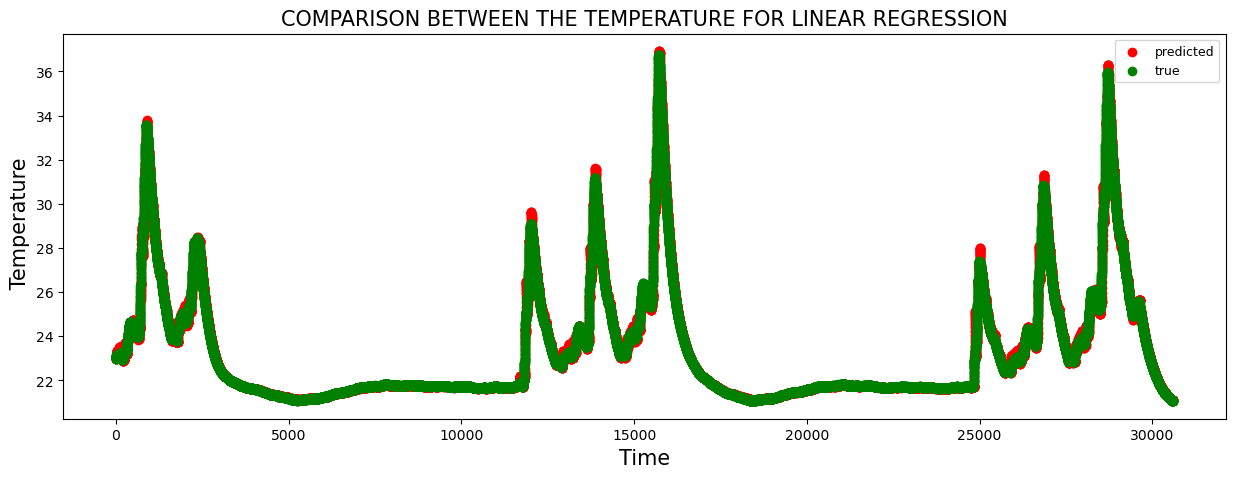

In [41]:
plt.figure(figsize=(15,5))
plt.scatter(X_test['time'],y_predict, c='red',label ='predicted')
plt.scatter(X_test['time'],y_test , c='green',label ='true')
plt.title("COMPARISON BETWEEN THE TEMPERATURE FOR LINEAR REGRESSION",fontsize=15)
plt.legend(loc="upper right", fontsize = 9)
plt.xlabel('Time', fontsize=15)
plt.ylabel(' Temperature', fontsize=15)


plt.show()

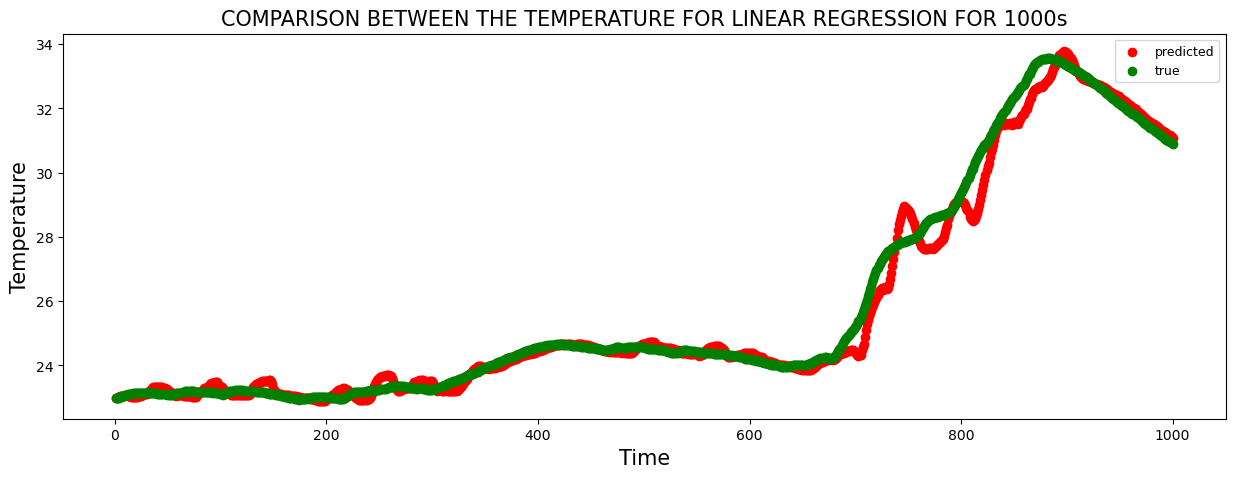

In [42]:
plt.figure(figsize=(15, 5))
plt.scatter(X_test['time'][:1000], y_predict[:1000], c='red', label='predicted')
plt.scatter(X_test['time'][:1000], y_test[:1000], c='green', label='true')
plt.title("COMPARISON BETWEEN THE TEMPERATURE FOR LINEAR REGRESSION FOR 1000s", fontsize=15)
plt.legend(loc="upper right", fontsize=9)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.show()

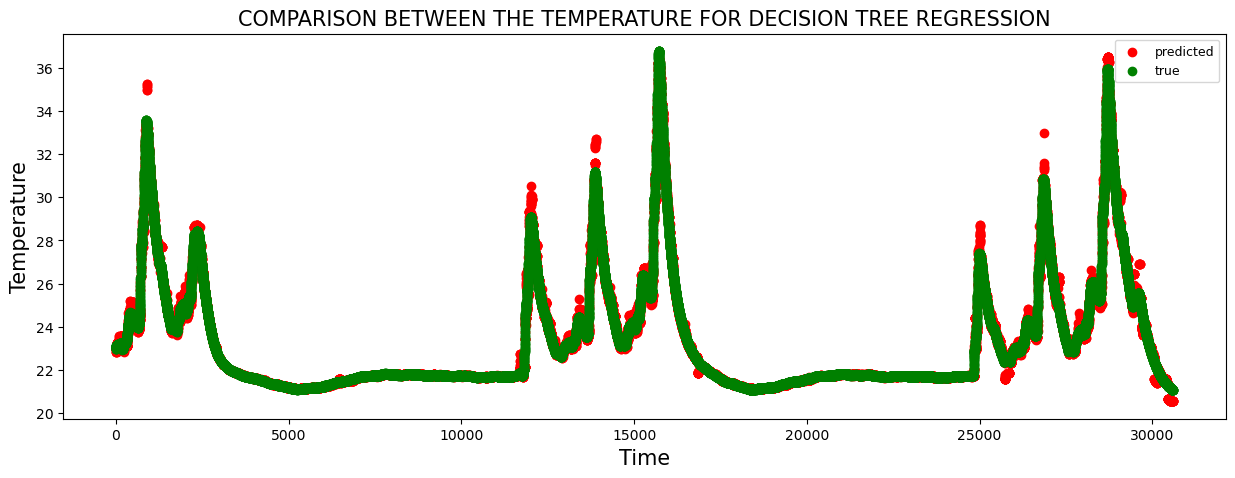

In [43]:
plt.figure(figsize=(15,5))
plt.scatter(X_test['time'],y_p, c='red',label ='predicted')
plt.scatter(X_test['time'],y_test , c='green',label ='true')
plt.title("COMPARISON BETWEEN THE TEMPERATURE FOR DECISION TREE REGRESSION",fontsize=15)
plt.legend(loc="upper right", fontsize = 9)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Temperature', fontsize=15)


plt.show()

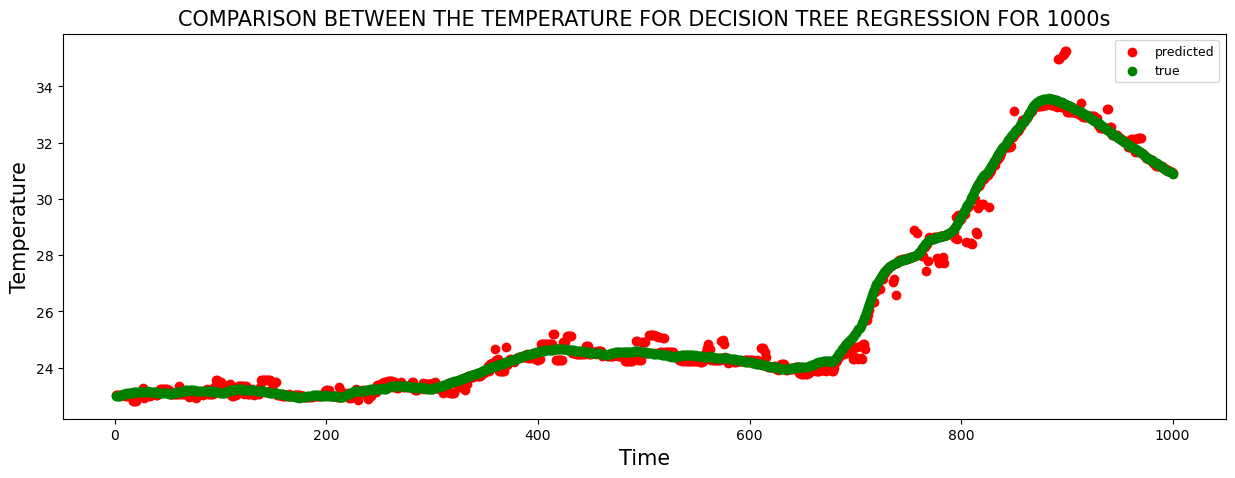

In [44]:
plt.figure(figsize=(15, 5))
plt.scatter(X_test['time'][:1000], y_p[:1000], c='red', label='predicted')
plt.scatter(X_test['time'][:1000], y_test[:1000], c='green', label='true')
plt.title("COMPARISON BETWEEN THE TEMPERATURE FOR DECISION TREE REGRESSION FOR 1000s", fontsize=15)
plt.legend(loc="upper right", fontsize=9)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.show()

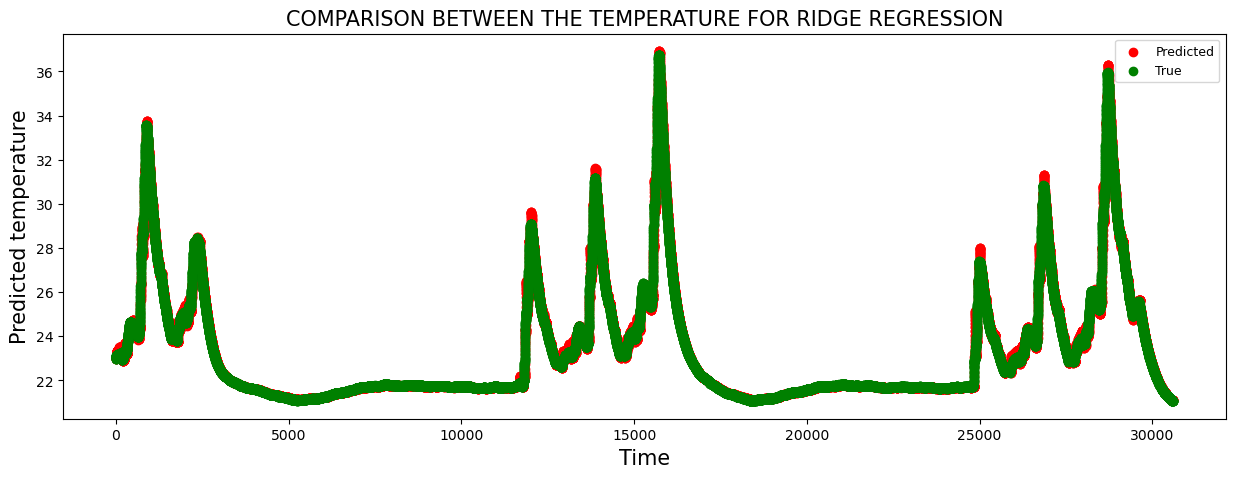

In [45]:
plt.figure(figsize=(15,5))
plt.scatter(X_test['time'],pred_test_rr, c='red',label ='Predicted')
plt.scatter(X_test['time'],y_test , c='green',label ='True')

plt.title("COMPARISON BETWEEN THE TEMPERATURE FOR RIDGE REGRESSION",fontsize=15)
plt.legend(loc="upper right", fontsize = 9)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Predicted temperature', fontsize=15)


plt.show()

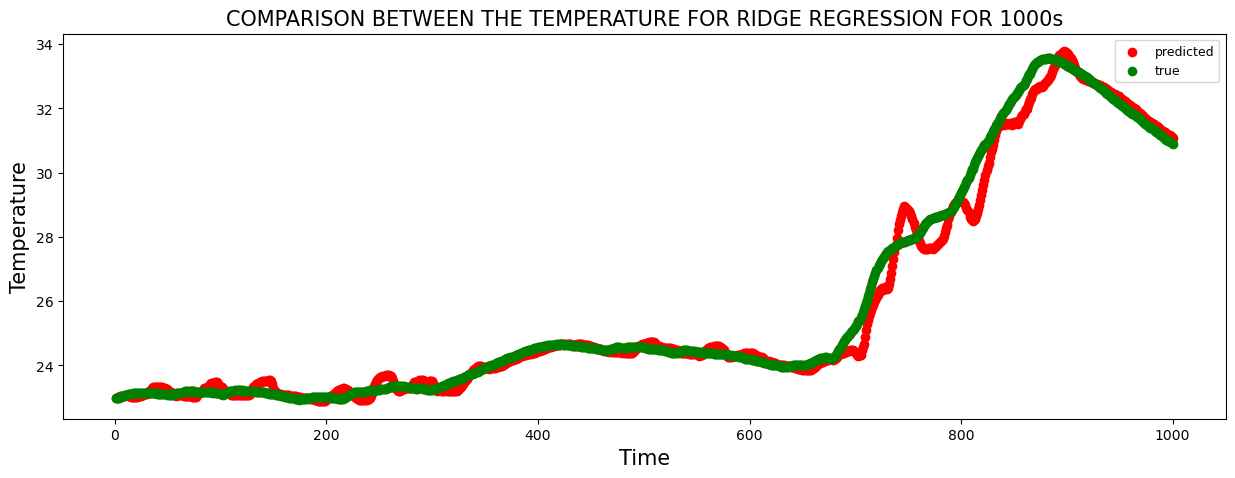

In [46]:
plt.figure(figsize=(15, 5))
plt.scatter(X_test['time'][:1000], pred_test_rr[:1000], c='red', label='predicted')
plt.scatter(X_test['time'][:1000], y_test[:1000], c='green', label='true')

plt.title("COMPARISON BETWEEN THE TEMPERATURE FOR RIDGE REGRESSION FOR 1000s", fontsize=15)
plt.legend(loc="upper right", fontsize=9)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.show()

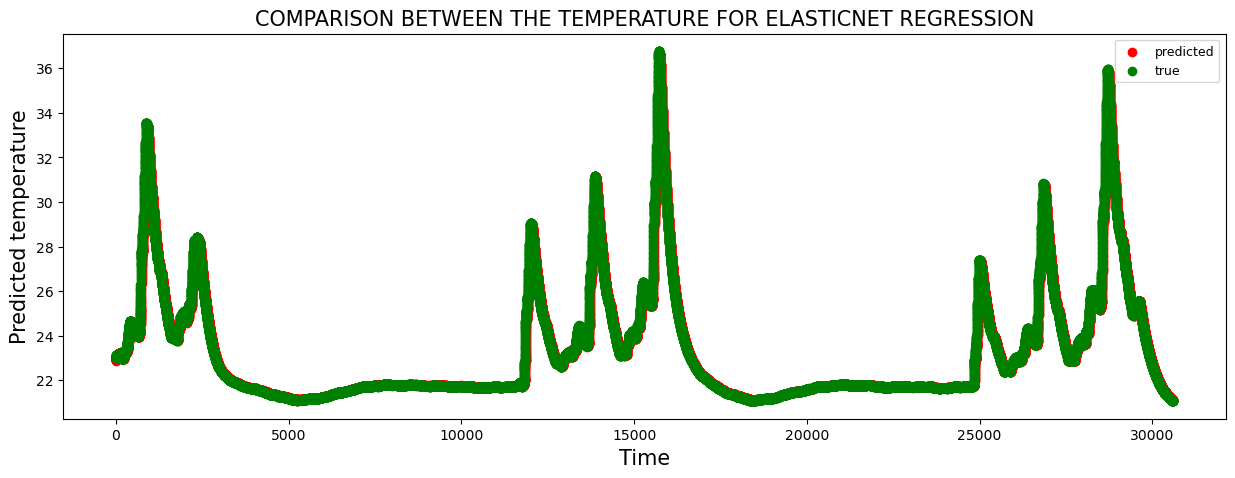

In [47]:
plt.figure(figsize=(15,5))
plt.scatter(X_test['time'],pred_test_enet, c='red',label ='predicted')
plt.scatter(X_test['time'],y_test , c='green',label ='true')
plt.title("COMPARISON BETWEEN THE TEMPERATURE FOR ELASTICNET REGRESSION",fontsize=15)
plt.legend(loc="upper right", fontsize = 9)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Predicted temperature', fontsize=15)


plt.show()

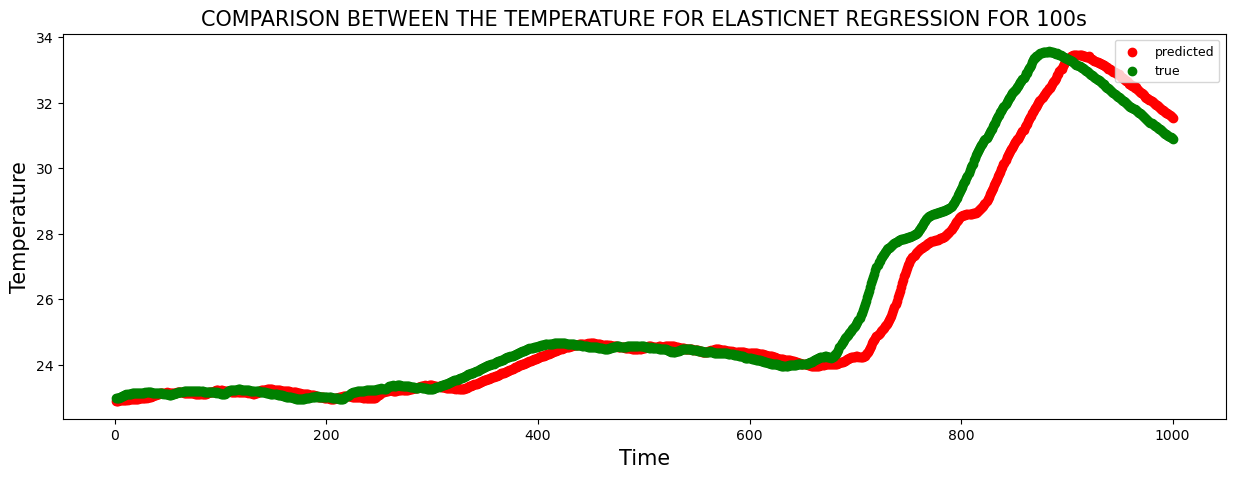

In [48]:
plt.figure(figsize=(15, 5))
plt.scatter(X_test['time'][:1000], pred_test_enet[:1000], c='red', label='predicted')
plt.scatter(X_test['time'][:1000], y_test[:1000], c='green', label='true')
plt.title("COMPARISON BETWEEN THE TEMPERATURE FOR ELASTICNET REGRESSION FOR 100s", fontsize=15)
plt.legend(loc="upper right", fontsize=9)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.show()